## Example to perform common edge analysis
This notebook explains how to calculate bootstrap probabilities for multiple datasets.  
The algorithms covered are DirectLiNGAM, ICA-LiNGAM, BottomUpParceLiNGAM, RCD, CAM-UV, GroupLiNGAM, and HighDimDirectLiNGAM.

## Import necessary packages

In [1]:
import lingam
import numpy as np
import pandas as pd
from lingam.utils import make_dot
from lingam.utils import get_common_edge_probabilities, print_common_edge_directions, make_dot_for_nan_probability_matrix

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

print([np.__version__, pd.__version__, lingam.__version__])

['1.26.4', '2.2.3', '1.10.0']


## Test data
We create test data consisting of 6 variables.

In [2]:
np.random.seed(0)
x3 = np.random.uniform(size=1000)
x0 = 3.0*x3 + np.random.uniform(size=1000)
x2 = 6.0*x3 + np.random.uniform(size=1000)
x1 = 3.0*x0 + 2.0*x2 + np.random.uniform(size=1000)
x5 = 4.0*x0 + np.random.uniform(size=1000)
x4 = 8.0*x0 - 1.0*x2 + np.random.uniform(size=1000)
X1 = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X1.head()

,x0,x1,x2,x3,x4,x5
0,2.239321,15.340724,4.104399,0.548814,14.176947,9.249925
1,2.155632,16.630954,4.767220,0.715189,12.775458,9.189045
2,2.284116,15.910406,4.139736,0.602763,14.201794,9.273880
3,2.343420,14.921457,3.519820,0.544883,15.580067,9.723392
4,1.314940,11.055176,3.146972,0.423655,7.604743,5.312976


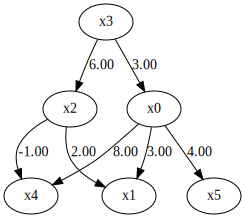

In [3]:
m = np.array([[0.0, 0.0, 0.0, 3.0, 0.0, 0.0],
              [3.0, 0.0, 2.0, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [8.0, 0.0,-1.0, 0.0, 0.0, 0.0],
              [4.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

make_dot(m)

In [4]:
np.random.seed(0)
x0 = np.random.uniform(size=1000)
x3 = 3.5*x0 + np.random.uniform(size=1000)
x2 = 6.5*x3 + np.random.uniform(size=1000)
x1 = 3.5*x0 + 2.5*x2 + np.random.uniform(size=1000)
x5 = 4.5*x0 + np.random.uniform(size=1000)
x4 = - 1.5*x2 + np.random.uniform(size=1000)
X2 = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T ,columns=['x0', 'x1', 'x2', 'x3', 'x4', 'x5'])
X2.head()

,x0,x1,x2,x3,x4,x5
0,0.548814,45.211678,17.150747,2.513728,-25.359341,2.762303
1,0.715189,45.162921,16.812056,2.513226,-24.920460,3.784870
2,0.602763,46.210489,17.328893,2.585498,-25.924740,2.849850
3,0.544883,45.892700,17.253621,2.615862,-25.527903,2.801687
4,0.423655,28.621780,10.529030,1.526767,-15.561349,1.959663


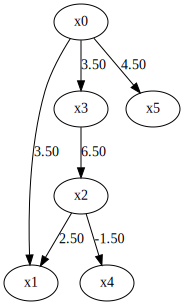

In [5]:
m = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [3.5, 0.0, 2.5, 0.0, 0.0, 0.0],
              [0.0, 0.0, 0.0, 6.5, 0.0, 0.0],
              [3.5, 0.0, 0.0, 0.0, 0.0, 0.0],
              [0.0, 0.0,-1.5, 0.0, 0.0, 0.0],
              [4.5, 0.0, 0.0, 0.0, 0.0, 0.0]])

make_dot(m)

In [6]:
labels = X1.columns.tolist()

## Calculating the probability of common edges
There are two ways to calculate the probability of common edges as bellow.
1. Calculate the bootstrap probability of common edges and multiply the results together.  
   This is appropriate when there are multiple combinations of datasets and algorithms.
3. Calculate the existence of common edges for each bootstrap and add the results together.  
   This method is appropriate when using the same resampling results for a single dataset.

This chapter explains each method below.

First, we will bootstrap the X1 and X2 datasets.

In [7]:
np.random.seed(0)
results = []
model = lingam.BottomUpParceLiNGAM()
results.append(model.bootstrap(X1, 2))
results.append(model.bootstrap(X2, 2))

### 1. Calculate the bootstrap probability of common edges and multiply the results together
This calculation method can be performed by specifying mode="across" as an argument to the get_common_edge_probabilities method.  
The result of get_common_edge_probabilities is returned as a three-dimensional array consisting of a probability matrix of common edges and a probability matrix of hidden common causes. Both of these matrices are calculated using the same method.

In [8]:
get_common_edge_probabilities(results, mode="across")

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.25, 0.  , 0.25, 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.5 , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]]])

To confirm that the results match those for mode “across,” we display the bootstrap probabilities for X1 and X2 and the results of multiplying them together.

In [9]:
pms = []
for i, result in enumerate(results, start=1):
    ams = result.adjacency_matrices_
    ams = np.where(~np.isnan(ams) & (ams != 0), 1, 0)
    pm = ams.sum(axis=0) / len(ams)
    print(f"Matrix of common edge occurrence probabilities calculated from bootstrap result {i}.")
    display(pd.DataFrame(pm, index=labels, columns=labels))
    pms.append(pm)
pm_all = np.prod(pms, axis=0)
print("Probability matrix of common edges obtained by multiplying both matrices.")
display(pd.DataFrame(pm_all, index=labels, columns=labels))

Matrix of common edge occurrence probabilities calculated from bootstrap result 1.


,x0,x1,x2,x3,x4,x5
x0,0.0,1.0,0.5,0.5,0.5,1.0
x1,0.0,0.0,0.0,0.5,0.0,0.5
x2,0.0,0.5,0.0,0.5,0.5,0.0
x3,0.0,0.0,0.0,0.0,0.0,0.0
x4,0.5,1.0,0.5,1.0,0.0,0.5
x5,0.0,0.0,0.0,0.0,0.0,0.0


Matrix of common edge occurrence probabilities calculated from bootstrap result 2.


,x0,x1,x2,x3,x4,x5
x0,0.0,0.0,0.0,0.0,0.0,0.0
x1,1.0,0.0,0.5,0.0,0.0,0.0
x2,0.5,0.5,0.0,0.5,0.0,0.0
x3,1.0,0.0,0.5,0.0,0.0,0.0
x4,0.0,0.0,1.0,0.0,0.0,0.0
x5,1.0,0.0,0.0,0.0,0.0,0.0


Probability matrix of common edges obtained by multiplying both matrices.


,x0,x1,x2,x3,x4,x5
x0,0.0,0.00,0.0,0.00,0.0,0.0
x1,0.0,0.00,0.0,0.00,0.0,0.0
x2,0.0,0.25,0.0,0.25,0.0,0.0
x3,0.0,0.00,0.0,0.00,0.0,0.0
x4,0.0,0.00,0.5,0.00,0.0,0.0
x5,0.0,0.00,0.0,0.00,0.0,0.0


### 2. Calculate the existence of common edges for each bootstrap and add the results together.
This calculation method can be performed by specifying mode="per" as an argument to the get_common_edge_probabilities method.  

In [10]:
get_common_edge_probabilities(results, mode="per")

array([[[0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0.5, 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0.5, 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. ]],

       [[0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. ],
        [0. , 0. , 0. , 0. , 0. , 0. ]]])

To confirm that the results match those from the previous mode='per', we display the existence matrix of common edges in each bootstrap and the total results.

In [11]:
pms = []
for i in range(results[0].adjacency_matrices_.shape[0]):
    ams = []
    for result in results:
        am = result.adjacency_matrices_[i]
        am = np.where(~np.isnan(am) & (am != 0), 1, 0)
        ams.append(am)
    am_all = np.logical_and.reduce(ams)
    print(f"The existence matrix of common edges calculated from bootstrap iteration {i+1}.")
    display(pd.DataFrame(am_all.astype(int), index=labels, columns=labels))
    pms.append(am_all.astype(int))
pm_all = np.sum(pms, axis=0) / len(results)
print("The probability matrix of common edges obtained by adding both matrices and dividing by the total number.")
display(pd.DataFrame(pm_all, index=labels, columns=labels))

The existence matrix of common edges calculated from bootstrap iteration 1.


,x0,x1,x2,x3,x4,x5
x0,0,0,0,0,0,0
x1,0,0,0,0,0,0
x2,0,0,0,1,0,0
x3,0,0,0,0,0,0
x4,0,0,0,0,0,0
x5,0,0,0,0,0,0


The existence matrix of common edges calculated from bootstrap iteration 2.


,x0,x1,x2,x3,x4,x5
x0,0,0,0,0,0,0
x1,0,0,0,0,0,0
x2,0,0,0,0,0,0
x3,0,0,0,0,0,0
x4,0,0,1,0,0,0
x5,0,0,0,0,0,0


The probability matrix of common edges obtained by adding both matrices and dividing by the total number.


,x0,x1,x2,x3,x4,x5
x0,0.0,0.0,0.0,0.0,0.0,0.0
x1,0.0,0.0,0.0,0.0,0.0,0.0
x2,0.0,0.0,0.0,0.5,0.0,0.0
x3,0.0,0.0,0.0,0.0,0.0,0.0
x4,0.0,0.0,0.5,0.0,0.0,0.0
x5,0.0,0.0,0.0,0.0,0.0,0.0


## Calculate common edges probabilities for multiple combinations of datasets and causal discovery algorithms
This chapter explains how to calculate the probability of common edges occurring from bootstrap results for multiple datasets.

In [12]:
np.random.seed(0)
X_list = [X1, X2]
models = [lingam.DirectLiNGAM(), lingam.ICALiNGAM()]
results = []
for X, model in zip(X_list, models):
    result = model.bootstrap(X, 100)
    results.append(result)

To display the list of edges, calculate the probability matrix of common edges.

In [13]:
cep = get_common_edge_probabilities(results)
print_common_edge_directions(cep, labels=labels)

x1 <--- x0 (100.0%)
x5 <--- x0 (100.0%)
x1 <--- x2 (100.0%)
x4 <--- x2 (100.0%)
x2 <--- x3 (96.0%)


The causal graph of common edges is as follows. The values of the edges are the occurrence probabilities.

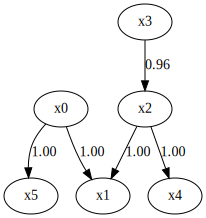

In [14]:
make_dot(cep[0])

## Calculate common edges probabilities by applying multiple causal discovery algorithms to using the same resampling results for a single dataset
In this chapter, we will prepare a method for applying resampling results from a single dataset to multiple causal discovery algorithms and explain how to calculate the probability of common edges.

In [15]:
import numbers
from sklearn.utils import check_array, resample

def _check_X_list(X_list):
    """Check input X list."""
    if not isinstance(X_list, list):
        raise ValueError("X_list must be a list.")
        
    if len(X_list) < 2:
        raise ValueError("X_list must be a list containing at least two items")
    
    _n_features = check_array(X_list[0]).shape[1]
    X_list_ = []
    for X in X_list:
        X_ = check_array(X)
        if X_.shape[1] != _n_features:
            raise ValueError(
                "X_list must be a list with the same number of features"
            )
        X_list_.append(X_)

    return X_list_


def bootstrap_single_dataset_models(X, cd_models, n_sampling):
    """
    Perform bootstrap-based causal discovery using a single dataset across multiple models.
    The same resampled data is applied to each model in every bootstrap iteration.

    Parameters
    ----------
    X : pandas.DataFrame or ndarray
        A single dataset for causal discovery.
        Must contain consistent variable columns.

    cd_models : list
        A list of causal discovery model instances.
        Each model must implement a callable `fit` method and expose an `adjacency_matrix_` attribute after fitting.

    n_sampling : int
        Number of bootstrap iterations to perform.
        Must be a positive integer.

    Returns
    -------
    bootstrap_results : list of BootstrapResult
        A list of BootstrapResult objects, each containing:
        - adjacency_matrices : ndarray
            Adjacency matrices estimated from each bootstrap sample.
        - total_effects : ndarray
            Placeholder for total causal effects (currently empty).
        - resampled_indices : list
            Indices used for resampling in each iteration.
    """
    # Check parameters
    X = check_array(X)

    if not isinstance(cd_models, list):
        raise ValueError("cd_models must be a list.")
        
    if len(cd_models) < 2:
        raise ValueError("cd_models must be a list containing at least two items")
        
    for model in cd_models:
        if not hasattr(model, "fit") and callable(getattr(model, "fit")):
            raise AttributeError(f"The model '{model} must implement a callable 'fit' method.")

    if not isinstance(n_sampling, (numbers.Integral, np.integer)) or n_sampling <= 0:
        raise ValueError("n_sampling must be an integer greater than 0.")
    
    # Bootstrap across combinations of datasets and causal discovery models
    bootstrap_results = []
    
    # Bootstrap procedure
    # If there is only one dataset, unify the resampling results across all models
    resampled_indices = []
    index = np.arange(X.shape[0])
    for i in range(n_sampling):
        resampled_X, resampled_index = resample(X, index)
        resampled_indices.append(resampled_index)
    for im, model in enumerate(cd_models):
        adjacency_matrices = np.zeros([n_sampling, X.shape[1], X.shape[1]])
        total_effects = np.zeros(adjacency_matrices.shape)
        for i in range(n_sampling):
            resampled_X = X[resampled_indices[i]]
            model.fit(resampled_X)
            adjacency_matrices[i] = model.adjacency_matrix_
        bootstrap_results.append(lingam.BootstrapResult(adjacency_matrices, total_effects, resampled_indices))

    return bootstrap_results


In [16]:
np.random.seed(0)
cd_models = [lingam.DirectLiNGAM(), lingam.ICALiNGAM()]
results = bootstrap_single_dataset_models(X1, cd_models, 100)

In [17]:
cep = get_common_edge_probabilities(results, mode="per")
print_common_edge_directions(cep, labels=labels)

x1 <--- x0 (100.0%)
x5 <--- x0 (100.0%)
x1 <--- x2 (100.0%)
x4 <--- x2 (100.0%)
x4 <--- x0 (98.0%)
x0 <--- x3 (98.0%)
x2 <--- x3 (96.0%)
x1 <--- x3 (4.0%)
x2 <--- x0 (2.0%)
x5 <--- x4 (2.0%)


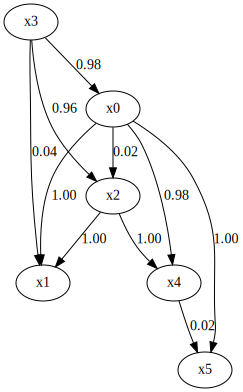

In [18]:
make_dot(cep[0])

## Models without bootstrap methods
CAMUV does not have a bootstrap method, so we will create a custom class that adds bootstrap to CAMUV.

In [19]:
from sklearn.utils import check_array, resample

class CustomCAMUV(lingam.CAMUV):

    def bootstrap(self, X, n_sampling=10):
        X = check_array(X)
        adjacency_matrices = np.zeros([n_sampling, X.shape[1], X.shape[1]])
        total_effects = np.zeros(adjacency_matrices.shape)
        resampled_indices = []
        index = np.arange(X.shape[0])
        for i in range(n_sampling):
            resampled_X, resampled_index = resample(X, index)
            resampled_indices.append(resampled_index)
            self.fit(resampled_X)
            adjacency_matrices[i] = self.adjacency_matrix_
        result = lingam.BootstrapResult(adjacency_matrices, total_effects, resampled_indices)
        return result

In [20]:
np.random.seed(0)
X_list = [X1, X2]
models = [CustomCAMUV(), lingam.GroupLiNGAM()]
results = []
for X, model in zip(X_list, models):
    result = model.bootstrap(X, 10)
    results.append(result)

The results can be displayed in the same way as described above.

In [21]:
cep = get_common_edge_probabilities(results, mode="per")
print_common_edge_directions(cep, labels=labels)

x5 <--- x0 (50.0%)
x1 <--- x2 (30.0%)
x2 <--- x3 (30.0%)
x2 <--- x4 (30.0%)
x2 <--- x1 (20.0%)
x4 <--- x3 (20.0%)
x1 <--- x0 (10.0%)
x1 <--- x3 (10.0%)
x1 <--- x4 (10.0%)
x5 <--> x0 (10.0%)


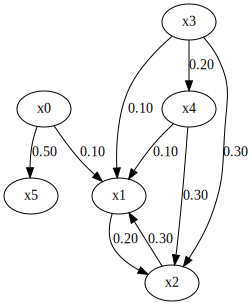

In [22]:
make_dot(cep[0])

## Bidirected edge indicating hidden common cause
This chapter explains how to display the probability of occurrence of bidirected edge indicating hidden common cause when using the BottomUpParceLiNGAM or RCD algorithms, which allow for hidden common causes.

In [23]:
np.random.seed(0)
X_list = [X1, X2]
models = [lingam.BottomUpParceLiNGAM(), lingam.RCD()]
results = []
for X, model in zip(X_list, models):
    result = model.bootstrap(X, 10)
    results.append(result)

In [24]:
cep = get_common_edge_probabilities(results, mode="across")
print_common_edge_directions(cep, labels=labels)

x1 <--- x0 (20.0%)
x2 <--- x3 (18.0%)
x3 <--> x1 (18.0%)
x4 <--- x0 (15.0%)
x4 <--- x2 (12.0%)
x2 <--- x0 (8.0%)
x2 <--> x1 (8.0%)
x3 <--> x2 (8.0%)
x4 <--- x1 (6.0%)
x2 <--- x4 (6.0%)
x1 <--- x3 (5.0%)
x1 <--- x2 (4.0%)
x5 <--> x2 (1.0%)


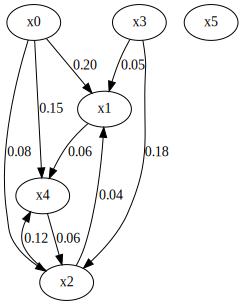

In [25]:
make_dot(cep[0])

we use the following 'make_dot_for_nan_probability_matrix' method to display the causal graph for the bidirected edge indicating hidden common cause.

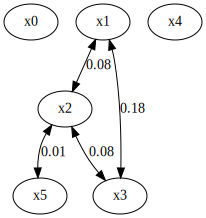

In [26]:
make_dot_for_nan_probability_matrix(cep[1])